In [14]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50 
import os
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.layers import GlobalMaxPooling2D
from numpy.linalg import norm
import pickle
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


In [15]:
resnet=ResNet50(weights='imagenet', 
                include_top=False
)

In [16]:
resnet.trainable=False

In [17]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']       

 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, None, None,   256        ['conv2_block3_1_conv[0][0]']    
 ization)                       64)                                                               
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, None, None,   0          ['conv2_block3_1_bn[0][0]']      
 n)                             64)                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, None, None,   36928       ['conv2_block3_1_relu[0][0]']    
          

                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
                                                                                                  
 conv3_block2_3_bn (BatchNormal  (None, None, None,   2048       ['conv3_block2_3_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv3_block2_add (Add)         (None, None, None,   0           ['conv3_block1_out[0][0]',       
                                512)                              'conv3_block2_3_bn[0][0]']      
                                                                                                  
 conv3_blo

                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_2_relu (Activatio  (None, None, None,   0          ['conv4_block1_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_0_conv (Conv2D)   (None, None, None,   525312      ['conv3_block4_out[0][0]']       
                                1024)                                                             
          

 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_block4_1_conv (Conv2D)   (None, None, None,   262400      ['conv4_block3_out[0][0]']       
                                256)                                                              
                                                                                                  
 conv4_block4_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block4_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block4_1_relu (Activatio  (None, None, None,   0          ['conv4_block4_1_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block6_add (Add)         (None, None, None,   0           ['conv4_block5_out[0][0]',       
                                1024)                             'conv4_block6_3_bn[0][0]']      
                                                                                                  
 conv4_block6_out (Activation)  (None, None, None,   0           ['conv4_block6_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv5_blo

 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
                                512)                                                              
                                                                                                  
 conv5_block3_2_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_2_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_2_relu (Activatio  (None, None, None,   0          ['conv5_block3_2_bn[0][0]']      
 n)                             512)                                                              
          

In [18]:
model=Sequential()
model.add(resnet)
model.add(GlobalMaxPooling2D())

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_max_pooling2d_1 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


# saving the model

In [49]:
os.makedirs("model")

In [50]:
model.save("./model/model.h5")

In [20]:
files=[]
for i in os.listdir("/Users/khumapokharel/Desktop/deepLearning/EXAMNOTEDELETEAPP/notedatadelteimage"):
    if i==".DS_Store":
        continue
    path=os.path.join("/Users/khumapokharel/Desktop/deepLearning/EXAMNOTEDELETEAPP/notedatadelteimage",i)
    files.append(path)
    
    
    


# processing on only one image just to show how does it work

In [21]:
image=load_img(files[0],target_size=(124,124))

In [22]:
imgarray=img_to_array(image)

In [23]:
imgarray.shape

(124, 124, 3)

In [24]:
integerimage=imgarray.astype(int)

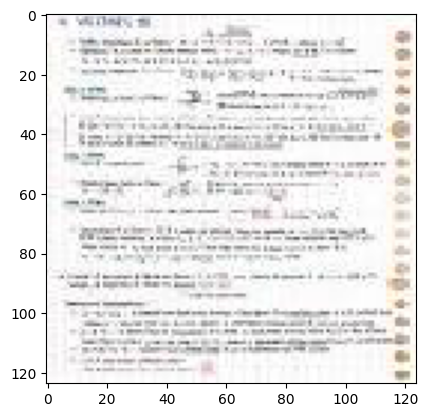

In [25]:
plt.imshow(integerimage)

In [26]:
expanded_image=np.expand_dims(image,axis=0)

In [27]:
preprocessed_image=preprocess_input(expanded_image)

In [28]:
weigths_from_layer=model.predict(preprocessed_image).flatten()


2023-11-02 02:12:19.005124: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 5s 5s/step


In [29]:
# normalize image
distancefromorigin=np.linalg.norm(weigths_from_layer)

In [30]:
normalized_weight=weigths_from_layer/distancefromorigin

In [31]:
print(normalized_weight)

[0.         0.         0.         ... 0.         0.         0.00465861]


# function for extracting the features

In [32]:
image_features=[]
def extractingthefeatures(file):
    
    image=load_img(file,target_size=(124,124))
    imgarray=img_to_array(image)
    expanded_image=np.expand_dims(image,axis=0)
    preprocessed_image=preprocess_input(expanded_image)
    weigths_from_layer=model.predict(preprocessed_image).flatten()
    distancefromorigin=np.linalg.norm(weigths_from_layer)
    normalized_weight=weigths_from_layer/distancefromorigin
    image_features.append(normalized_weight)
    
    
    
    




In [33]:
for i in files:
    extractingthefeatures(i)



1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 20ms/step


In [36]:
image_features




[array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00465861], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.00316303, 0.00077117, 0.        , ..., 0.        , 0.        ,
        0.13171431], dtype=float32),
 array([0.        , 0.        , 0.00150501, ..., 0.        , 0.        ,
        0.05370567], dtype=float32),
 array([0.00335512, 0.        , 0.        , ..., 0.        , 0.02056909,
        0.1224452 ], dtype=float32),
 array([0.00077402, 0.        , 0.        , ..., 0.02020561, 0.01273677,
        0.00873728], dtype=float32),
 array([0.00011685, 0.        , 0.        , ..., 0.05547233, 0.00194576,
        0.02020898], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.05027242,
        0.01158193], dtype=float32),
 array([0.       , 0.       , 0.       , ..., 0.       , 0.0284797,
        0.0171585], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.0082221 ,

In [62]:
# os.makedirs("image_features")

# finding the parameter

In [56]:
with open("./image_features/image_features.pkl",'wb') as file:
    pickle.dump(image_features,file)
    

In [57]:
import pickle
with open("./image_features/image_features.pkl",'rb') as file:
    features=pickle.load(file)

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_max_pooling2d_1 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [58]:
features

[array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00465861], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.00316303, 0.00077117, 0.        , ..., 0.        , 0.        ,
        0.13171431], dtype=float32),
 array([0.        , 0.        , 0.00150501, ..., 0.        , 0.        ,
        0.05370567], dtype=float32),
 array([0.00335512, 0.        , 0.        , ..., 0.        , 0.02056909,
        0.1224452 ], dtype=float32),
 array([0.00077402, 0.        , 0.        , ..., 0.02020561, 0.01273677,
        0.00873728], dtype=float32),
 array([0.00011685, 0.        , 0.        , ..., 0.05547233, 0.00194576,
        0.02020898], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.05027242,
        0.01158193], dtype=float32),
 array([0.       , 0.       , 0.       , ..., 0.       , 0.0284797,
        0.0171585], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.0082221 ,

In [60]:
def findingthesimilaritybetnimage(file):
    image=load_img(file,target_size=(124,124))
    imgarray=img_to_array(image)
    expanded_image=np.expand_dims(image,axis=0)
    preprocessed_image=preprocess_input(expanded_image)
    weigths_from_layer=model.predict(preprocessed_image).flatten()
    distancefromorigin=np.linalg.norm(weigths_from_layer)
    normalized_weight=weigths_from_layer/distancefromorigin
    
#     using k nearest neighbors 
    neighbors=NearestNeighbors(n_neighbors=50,algorithm='brute',metric='euclidean')
    neighbors.fit(features)
    distances,indices=neighbors.kneighbors([normalized_weight])
    print(distances,indices)
    
    
    



In [43]:
findingthesimilaritybetnimage(files[0])

1/1 [==============================] - 0s 92ms/step
[[0.         0.53304719 0.53995012 0.54431321 0.55270332 0.55300686
  0.56876304 0.58053894 0.59201381 0.59346009 0.59916917 0.60056887
  0.60394361 0.60454723 0.61388909 0.62754832 0.63085789 0.63112266
  0.63408578 0.63408578 0.64365242 0.64443188 0.64443188 0.64757029
  0.64757029 0.64942512 0.65316385 0.66312769 0.66475462 0.66475462
  0.66547061 0.66547061 0.66725442 0.6674097  0.67135982 0.67168947
  0.67609288 0.67609288 0.67948757 0.68688868 0.68766863 0.68766863
  0.68971598 0.6909792  0.69127546 0.69300919 0.69635842 0.69635842
  0.70233754 0.70233754]] [[  0 139  40 187 128  26   1 169  17 127  29  56  21  71  77  55 110 155
   11  43 183  81 162 120 178  42  98 188 199  10 108 148   9  41  72 171
  103 151 115 144 104 145  97  12 170  95 159 186   3  63]]


# just checking similarity to choose the best parameter to delete photos

In [ ]:
findingthesimilaritybetnimage("/Users/khumapokharel/Desktop/deepLearning/EXAMNOTEDELETEAPP/imageofnotes/WhatsApp Image 2023-07-21 at 13.29.58.jpeg")

In [ ]:
findingthesimilaritybetnimage("/Users/khumapokharel/Desktop/deepLearning/EXAMNOTEDELETEAPP/imageofnotes/WhatsApp Image 2023-07-25 at 08.57.06 (1).jpeg")

In [ ]:
findingthesimilaritybetnimage("/Users/khumapokharel/Desktop/deepLearning/EXAMNOTEDELETEAPP/imageofnotes/WhatsApp Image 2023-09-22 at 02.58.16.jpeg")

# checking for the image that is not a part of the handwritten image 

In [ ]:
"/Users/khumapokharel/Desktop/learnflutter/kpid/build/app/intermediates/flutter/debug/flutter_assets/assets/khuma.jpeg"

In [ ]:
/Users/khumapokharel/Desktop/2022freshers/IMG_0376.HEIC

In [233]:
findingthesimilaritybetnimage('/Users/khumapokharel/Desktop/learnflutter/kpid/build/app/intermediates/flutter/debug/flutter_assets/assets/khuma.jpeg')

1/1 [==============================] - 0s 92ms/step
[[1.09939546 1.09948236 1.14028262 1.15151643 1.15460857 1.15460857
  1.155342   1.15879634 1.16467668 1.16484719 1.16484719 1.16628764
  1.16641566 1.16815153 1.16983516 1.17022019 1.17046903 1.17191508
  1.1724462  1.17251925 1.1740858  1.1740858  1.17722179 1.17815856
  1.17998991 1.18061792 1.18319942 1.18319942 1.18503314 1.18811315
  1.18811315 1.18847601 1.18982444 1.19578608 1.19606139 1.19668854
  1.19705353 1.19754598 1.19755912 1.19780297 1.1987255  1.1987255
  1.19952831 1.1995532  1.19963653 1.1997669  1.20043436 1.20043436
  1.20047314 1.20087207]] [[146  94 109 152  23 100 112  92 138 124 189  50  30  31 167 142 172  87
  130  65  14  53 117  20 114 190 134  51 196 123  67 125 182  89  60   8
  198  74   6 154 119  68 157 177 111  28  35  85 175 163]]


# if the distance of the images is less than 0.83 then delete it  (Start delete from here)

In [63]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50 
import os
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.layers import GlobalMaxPooling2D
from numpy.linalg import norm
import pickle
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [64]:
import pickle
from tensorflow.keras.models import load_model

with open("./image_features/image_features.pkl",'rb') as file:
    features=pickle.load(file)


In [65]:
model=load_model("./model/model.h5")

In [72]:
deletefile=[]
def deleteimage(file):
    global i
    image=load_img(file,target_size=(124,124))
    imgarray=img_to_array(image)
    expanded_image=np.expand_dims(image,axis=0)
    preprocessed_image=preprocess_input(expanded_image)
    weigths_from_layer=model.predict(preprocessed_image).flatten()
    distancefromorigin=np.linalg.norm(weigths_from_layer)
    normalized_weight=weigths_from_layer/distancefromorigin
    
#     using k nearest neighbors 
    neighbors=NearestNeighbors(n_neighbors=1,algorithm='brute',metric='euclidean')
    neighbors.fit(features)
    distances,indices=neighbors.kneighbors([normalized_weight])
    
    if distances<0.85:
        os.remove(file)
        deletefile.append(imgarray.astype(int))
        

        
        
#  show the image and delete the file 


        
    
    



In [71]:
path="/Users/khumapokharel/Desktop/deepLearning/EXAMNOTEDELETEAPP/imagesdifferent"

In [84]:

deletefile=[]
for i in os.listdir(path):
    if i==".DS_Store":
        continue
    deleteimage(os.path.join(path,i))

1/1 [==============================] - 0s 24ms/step


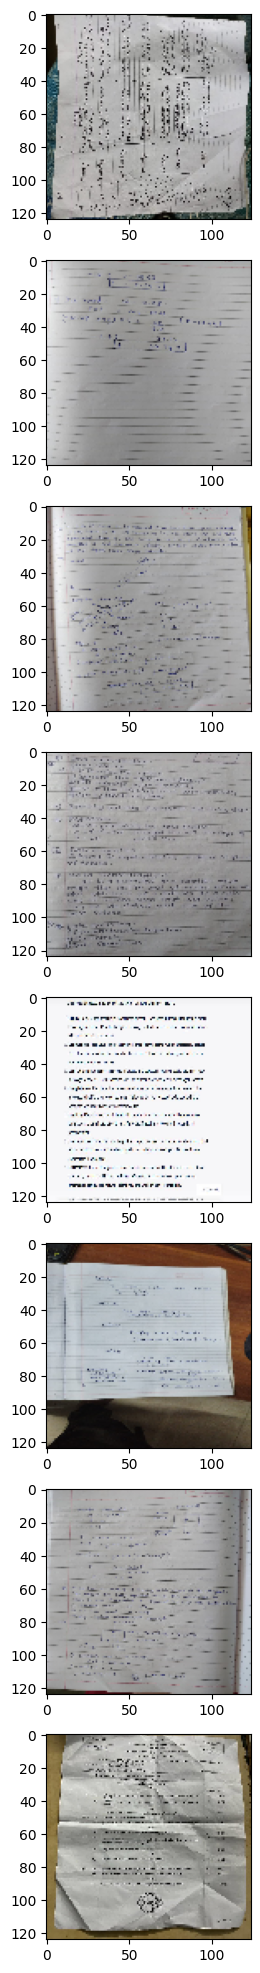

In [85]:
fig, axs = plt.subplots(8, 1,figsize=(25,25))
i=0
for k in deletefile:
    ax=axs[i]
    ax.imshow(k)
    i=i+1
    
    